# The Plan

## Read in CSV Data


## Formalize State 


## Make Markov Chain


## Histogram of States


## Visualize Markov Chain


## Evaluate Markov Chain

In [1]:
import pandas as pd


TICKER = "AMZN"
base_path = "./data/"
filename = base_path + f'{TICKER}-histnews-merged.csv'
news_df = pd.read_csv(filename)

results_path = "./results/"
results_file_path = results_path + f"{TICKER}_results.txt"
results_file = open(results_file_path, 'w+')
news_df

,author,content,created_at,headline,id,images,source,summary,symbols,updated_at,url,Sentiment_New
0,Charles Gross,NaN,2022-12-30T17:52:25Z,Top Wall Street Bets Mentions for Friday Decem...,30239495,[],benzinga,NaN,"['AAPL', 'AMC', 'AMZN', 'ASTS', 'GME', 'JPM', ...",2022-12-30T17:52:25Z,https://www.benzinga.com/news/22/12/30239495/t...,neutral
1,Franca Quarneti,NaN,2022-12-30T16:05:36Z,The 5 Most Viewed FPS Games On Twitch In 2022:...,30219430,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,"With 15 million daily users, Amazon (NASDAQ: A...","['AMZN', 'ATVI', 'EA', 'MSFT', 'SONY', 'TCEHY']",2022-12-30T16:05:37Z,https://www.benzinga.com/general/entertainment...,neutral
2,Nina Zdinjak,NaN,2022-12-29T18:09:51Z,From Cannabis Killing 100% Cancer Cells To Sno...,30227139,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Here goes another trying year for the cannabis...,"['AMZN', 'GOOGL', 'META', 'NFLX', 'TRSSF', 'TS...",2022-12-30T15:11:38Z,https://www.benzinga.com/markets/cannabis/22/1...,neutral
3,Lisa Levin,NaN,2022-12-30T10:36:22Z,"Dow Surges Over 300 Points, Market Volatility ...",30234551,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,"US stocks closed higher on Thursday, driven by...","['AAPL', 'AMZN', 'TSLA']",2022-12-30T10:36:23Z,https://www.benzinga.com/news/earnings/22/12/3...,positive
4,Adam Eckert,NaN,2022-12-29T21:58:47Z,Legendary Sports Broadcaster Al Michaels Appla...,30231739,"[{'size': 'large', 'url': 'https://cdn.benzing...",benzinga,Amazon.com. Inc. (NASDAQ: AMZN) is set to broa...,['AMZN'],2022-12-29T21:58:47Z,https://www.benzinga.com/general/entertainment...,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
15256,Benzinga,NaN,2015-01-05T16:29:36Z,Who Stands To Profit From Net Neutrality?,5117737,[],NaN,NaN,"['AMZN', 'CMCSA', 'GOOG', 'NFLX', 'SNE', 'VZ',...",2015-01-05T16:31:06Z,https://www.benzinga.com/node/5117737,neutral
15257,Benzinga,NaN,2015-01-05T14:02:27Z,Amazon Reports Over 2 Billion Items Sold By Am...,5118518,[],NaN,NaN,['AMZN'],2015-01-05T14:02:27Z,https://www.benzinga.com/node/5118518,neutral
15258,Benzinga,NaN,2015-01-05T12:00:01Z,US Stock Futures Slip Ahead Of Auto Sales Data,5117820,[],NaN,NaN,"['AMZN', 'CAM', 'IR', 'SBUX', 'SSH', 'STXS']",2015-01-05T12:00:02Z,https://www.benzinga.com/node/5117820,negative
15259,Benzinga,NaN,2015-01-05T11:03:23Z,Amazon Announces Sellers Sold 2B+ Items Worldw...,5117631,[],NaN,NaN,['AMZN'],2015-01-05T11:03:23Z,https://www.benzinga.com/node/5117631,positive


In [2]:
# # get the price data into the dataframe if it doesn't exist already
# if 'Price' not in df.columns: 
#     price_df = pd.read_csv(f'../data/stock_price_data/{TICKER}.csv')
    
#     news_df['created_at'] = pd.to_datetime(news_df['created_at']).dt.date
#     price_df['Date'] = pd.to_datetime(price_df['Date']).dt.date
    
#     df = pd.merge(news_df, price_df, left_on='created_at', right_on='Date', how='inner')
#     #     df = df[['created_at', 'Sentiment_New', 'Close']].rename(columns={'Close': 'Price'})
#     df = df.rename(columns={'Close': 'Price'})

#     # read the merged_df and set the index to the "created_at" column
#     df["created_at"] = pd.to_datetime(df["created_at"])
#     df.set_index("created_at", inplace=True)

# df


# get the price data into the dataframe if it doesn't exist already
if 'Price' not in news_df.columns: 
    price_df = pd.read_csv(f'../data/stock_price_data/{TICKER}.csv')

    
    #     price_df = pd.read_csv(f'../data/stock_price_data/GOOG.csv')
    news_df['created_at'] = pd.to_datetime(news_df['created_at']).dt.date
    price_df['Date'] = pd.to_datetime(price_df['Date']).dt.date
    
    df = pd.merge(news_df, price_df, left_on='created_at', right_on='Date', how='inner')

    # keep all columns from news_df in the merged dataframe
    df = df[['created_at', 'Sentiment_New', 'Open', 'High', 'Low', 'Close', 'Volume']].rename(columns={'Close': 'Price'})

    # read the merged_df and set the index to the "created_at" column
    df["created_at"] = pd.to_datetime(df["created_at"])
    df.set_index("created_at", inplace=True)

df.head()

,Sentiment_New,Open,High,Low,Price,Volume
created_at,,,,,,
2022-12-30,neutral,83.120003,84.050003,82.470001,84.00,62401200
2022-12-30,neutral,83.120003,84.050003,82.470001,84.00,62401200
2022-12-30,positive,83.120003,84.050003,82.470001,84.00,62401200
2022-12-29,neutral,82.870003,84.550003,82.550003,84.18,54995900
2022-12-29,positive,82.870003,84.550003,82.550003,84.18,54995900


           Sentiment_New      Price  Stock_Movement
created_at                                         
2015-01-05       neutral  15.109500             NaN
2015-01-07      positive  14.921000       -0.188500
2015-01-08      negative  15.023000        0.102000
2015-01-09      negative  14.846500       -0.176499
2015-01-12       neutral  14.570500       -0.276000
...                  ...        ...             ...
2022-12-23       neutral  85.250000        1.459999
2022-12-27       neutral  83.040001       -2.209999
2022-12-28      positive  81.820000       -1.220001
2022-12-29       neutral  84.180000        2.360001
2022-12-30       neutral  84.000000       -0.180000

[1987 rows x 3 columns]
                  (negative, down)  (negative, up)  (neutral, down)  \
(negative, down)          0.093567        0.146199         0.163743   
(negative, up)            0.127660        0.117021         0.180851   
(neutral, down)           0.117978        0.081461         0.219101   
(neutral, up)  

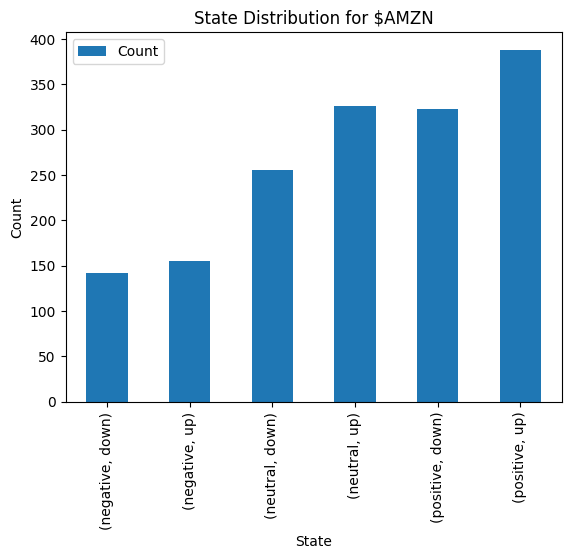

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df['created_at'] = pd.to_datetime(df['created_at'])

# Calculate the last price and overall sentiment for each day
df_daily = df.groupby('created_at').agg({'Sentiment_New': lambda x: x.mode()[0], 'Price': 'last'})

# Calculate stock movement based on daily prices
df_daily['Stock_Movement'] = df_daily['Price'].diff()

print(df_daily)
df_daily['Stock_Movement'] = df_daily['Stock_Movement'].apply(lambda x: 'up' if x >= 0 else 'down')

# Create states
df_daily['State'] = list(zip(df_daily['Sentiment_New'], df_daily['Stock_Movement']))

# Split into training and test set
df_train, df_test = train_test_split(df_daily, test_size=0.2, shuffle=False)

# Calculate transition probabilities
states = df_train['State'].unique()
n_states = len(states)
transition_matrix = np.zeros((n_states, n_states))

for (i, state1), (j, state2) in zip(enumerate(df_daily['State']), enumerate(df_daily['State'][1:])):
    for a, state3 in enumerate(states):
        for b, state4 in enumerate(states):
            if state1 == state3 and state2 == state4:
                transition_matrix[a, b] += 1


# Normalize the transition matrix
transition_matrix = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Create a DataFrame for easier viewing
df_transition = pd.DataFrame(transition_matrix, index=states, columns=states)
df_transition = df_transition.sort_index(axis=1).sort_index(axis=0)
print(df_transition)

# df_transtion = df_transition.sort_values(states)



# Create histogram for state frequencies in the training set
state_counts = Counter(df_train['State'])
df_state_counts = pd.DataFrame.from_dict(state_counts, orient='index').reset_index()
df_state_counts = df_state_counts.rename(columns={'index':'State', 0:'Count'})

# df_transtion = df_state_counts.sort_values('State')
df_state_counts = df_state_counts.sort_values('State')


df_state_counts.plot(kind='bar', x='State', y='Count')

plt.title(f'State Distribution for ${TICKER}')
plt.xlabel('State')
plt.ylabel('Count')

plt.savefig(results_path+f'{TICKER}-state-distribution')
plt.show()

# Predict the next state for each state in the test set
test_states = df_test['State'].values

In [4]:
states = sorted(list(states))
print(states)

[('negative', 'down'), ('negative', 'up'), ('neutral', 'down'), ('neutral', 'up'), ('positive', 'down'), ('positive', 'up')]


In [5]:
# Evaluation           
test_states_predicted = [states[np.argmax(transition_matrix[states.index(state)])] for state in test_states[:-1]]
test_states_predicted = list(map(tuple, test_states_predicted))

overall_acc = 0
for i in range(len(test_states[1:])):
    if test_states_predicted[i] == test_states[1:][i]:
        overall_acc += 1
overall_acc /= len(test_states[1:])
sentiment_acc = np.mean([s1[0] == s2[0] for s1, s2 in zip(test_states[1:], test_states_predicted)])
movement_acc = np.mean([s1[1] == s2[1] for s1, s2 in zip(test_states[1:], test_states_predicted)])

results_file.write(f"Overall accuracy: {overall_acc}\n")
results_file.write(f"Sentiment accuracy: {sentiment_acc}\n")
results_file.write(f"Stock movement accuracy: {movement_acc}\n\n")

45

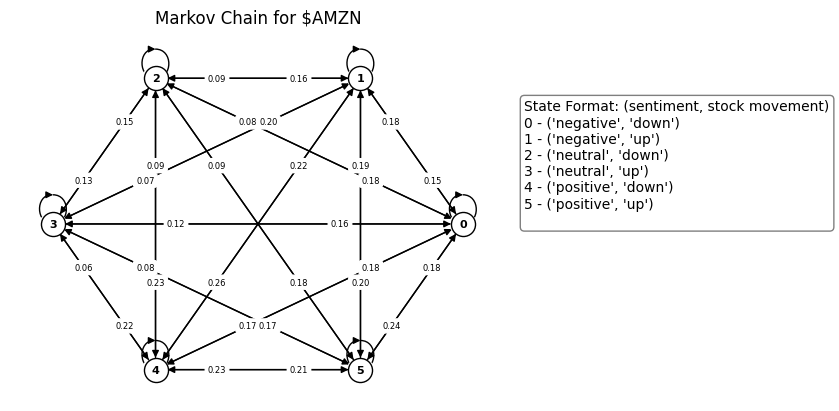

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# create an empty directed graph
G = nx.DiGraph()

# G.add_nodes_from(states)
G.add_nodes_from([i for i in range(len(states))])


# add edges to the graph with the transition probabilities as edge labels
for i, row in enumerate(transition_matrix):
    for j, prob in enumerate(row):
        G.add_edge(i, j, weight=prob)

        
pos = nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='white', edgecolors='black')
nx.draw_networkx_edges(G, pos)
edge_labels = {(u, v): '{:.2f}'.format(d['weight']) for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=6, rotate=False)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
plt.axis('off')

text_str = "State Format: (sentiment, stock movement)\n"
for i in range(len(states)):
    text_str += f"{i} - {str(states[i])}\n"

props = dict(boxstyle='round', facecolor='white', alpha=0.5)
plt.text(1.3, 0, text_str, bbox=props)
plt.title(f"Markov Chain for ${TICKER}")
plt.savefig(results_path+ f'{TICKER}-markov-chain')

plt.show()

In [7]:
table_df = pd.DataFrame(transition_matrix, index=states, columns=states)

# format the DataFrame for display
# pd.set_option('precision', 2)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
results_file.write(repr(table_df))
results_file.close()